In [ ]:
import pandas as pd

traindata = pd.read_csv('files/csv/traindata.csv')
X = traindata[['lat', 'lng']]
Y = traindata['price_per_m2']

In [ ]:
import random

def get_lat(lat):
    return lat + random.uniform(-0.000406*5, 0.000406*5)

def get_lng(lng):
    return lng + random.uniform(-0.000306*5, 0.000306*5)

traindata_unique = traindata.groupby(['lat', 'lng']).quantile(q=0.5).reset_index()
traindata_dup = pd.concat([traindata_unique] * 100, ignore_index=True)
X = traindata_dup[['lat', 'lng']]
X['lat'] = X['lat'].apply(get_lat)
X['lng'] = X['lng'].apply(get_lng)
Y = traindata_dup['price_per_m2']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

poly = PolynomialFeatures(degree=4).fit(X_scaled)
X_scaled = poly.transform(X_scaled)

In [155]:
import joblib

with open('files/pkl/model_v1.pkl', 'rb') as f:
    model = joblib.load(f)
    Y_pred = model.predict(X_scaled) * 1e4
    val_error = Y_pred - Y

In [ ]:
# with open('files/pkl/model_v1.pkl', 'rb') as f:
#     model = joblib.load(f)
#     Y_pred = model.predict(X_scaled[100:103]) * 1e4

# for pred, actual in zip(Y_pred, Y[100:103]):
#     print("pred: {:,}".format(int(pred)).replace(",", "."))
#     print("actual: {:,}".format(int(actual)).replace(",", "."))

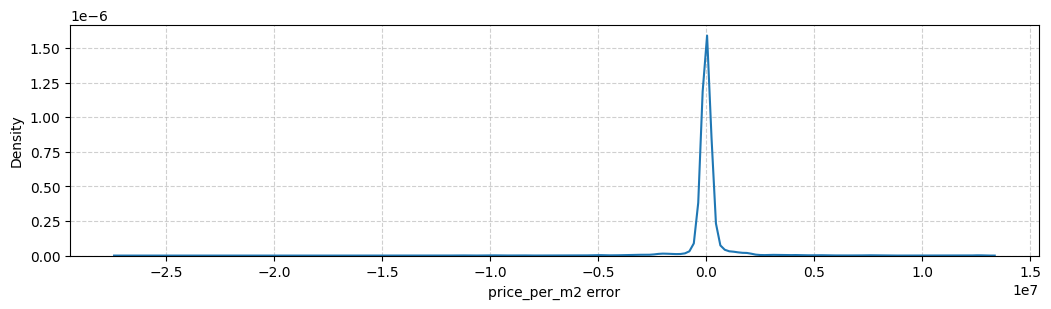

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

_, ax = plt.subplots(1,1, figsize=(12.5,3))
sns.kdeplot(ax=ax, data=val_error.reset_index(drop=True).sort_values())

plt.xlabel("price_per_m2 error")
plt.ylabel("Density")
plt.grid(True, alpha=0.6, linestyle="--")
plt.show()

In [ ]:
# df = pd.DataFrame({'c1': [100, 120, 100], 'c2': [20, 30, 20], 'c3': [30, 10, 5]})
# df

In [ ]:
# df.groupby(['c1','c2']).mean().reset_index()

In [171]:
# dump standardscaler and polynomialfeatures

import numpy as np
test = np.array([-6.866404, 107.563978]).reshape(1,2)
test = scaler.transform(test)
test = poly.transform(test)
model.predict(test) * 1e4

/home/techlead/projects/house-scorer/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3979579.8], dtype=float32)